In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
import dipy.reconst.sfm as sfm
import dipy.reconst.csdeconv as csd
import dipy.reconst.dti as dti
import dipy.core.gradients as grad

In [3]:
import utils

In [4]:
"%—voxel1——-voxel2——-voxel3-—-voxel4——-voxel5——-voxel6"
seen_signal_x = np.loadtxt('./seenSignaX.txt', skiprows=1)
seen_signal = np.loadtxt('./seenSignal.txt', skiprows=1)

In [5]:
"%--dir-x---dir-y----dir-z-----|G|-----DELTA---delta-----TE---"
seen_scheme = np.loadtxt('./seenScheme.txt', skiprows=1)
unseen_scheme = np.loadtxt('./unseenScheme.txt', skiprows=1)

In [6]:
bvecs_seen = seen_scheme[:, :3]
bvecs_unseen = unseen_scheme[:, :3]

In [7]:
g_seen = seen_scheme[:, 3] * 1000 #mT/m
Delta_seen = seen_scheme[:, 4] * 1000 
delta_seen = seen_scheme[:, 5] * 1000
TE_seen = seen_scheme[:, 6] * 1000 # msec

g_unseen = unseen_scheme[:, 3] * 1000 #mT/m
Delta_unseen = unseen_scheme[:, 4] * 1000 
delta_unseen = unseen_scheme[:, 5] * 1000
TE_unseen = unseen_scheme[:, 6] * 1000 # msec

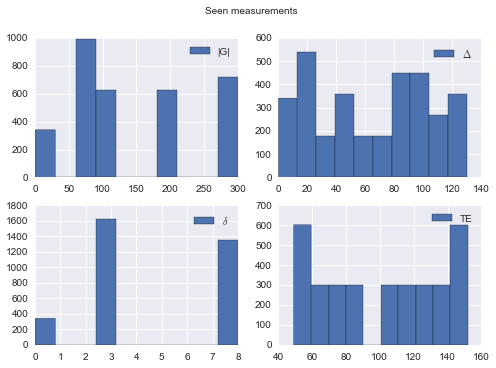

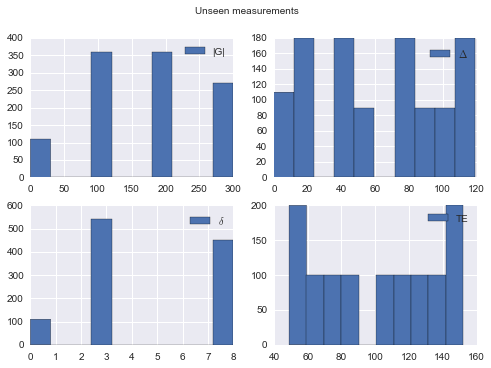

In [8]:
fig, ax = plt.subplots(2, 2)
for a, stat, label in zip(ax.ravel(), 
                          [g_seen, Delta_seen, delta_seen, TE_seen], 
                          ['|G|', '$\Delta$', '$\delta$', 'TE']):
    a.hist(stat, label=label)
    a.legend()
fig.suptitle('Seen measurements')
fig, ax = plt.subplots(2, 2)

for a, stat, label in zip(ax.ravel(), 
                          [g_unseen, Delta_unseen, delta_unseen, TE_unseen], 
                          ['|G|', '$\Delta$', '$\delta$', 'TE']):
    a.hist(stat, label=label)
    a.legend()
    
fig.suptitle('Unseen measurements')


In [10]:
bvals_seen = utils.b_value(g_seen, delta_seen, Delta_seen)
bvals_unseen = utils.b_value(g_unseen, delta_unseen, Delta_unseen)

(array([ 560.,    0.,  180.,  180.,    0.,    0.,    0.,   90.,    0.,   90.]),
 array([     0.        ,   1783.16287297,   3566.32574595,   5349.48861892,
          7132.65149189,   8915.81436487,  10698.97723784,  12482.14011081,
         14265.30298379,  16048.46585676,  17831.62872973]),
 <a list of 10 Patch objects>)

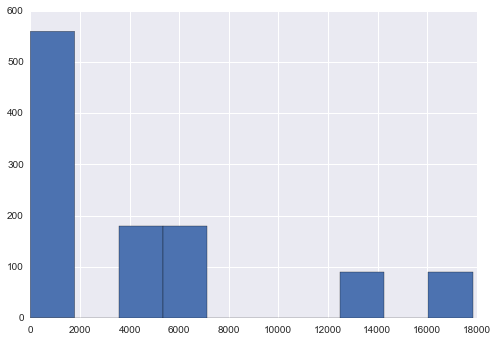

In [11]:
fig, ax = plt.subplots(1)
ax.hist(bvals_unseen)